In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [8]:
#1 Load the given dataset
df=pd.read_csv('EMP_visu.csv')
y=df.Price

In [10]:
df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,Diesel,90,1,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,Diesel,90,0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,Diesel,90,0,0,...,1,1,1,0,1,0,1,0,0,0


In [11]:
#2 Conduct the pre-processing steps
df.dropna(inplace=True)
df.isnull().sum()

Id                  0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [13]:
#3 Remove the target variable
df.drop(['Price'],axis=1,inplace=True)
df

,Id,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,23,10,2002,46986,Diesel,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,2,23,10,2002,72937,Diesel,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,3,24,9,2002,41711,Diesel,90,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,4,26,7,2002,48000,Diesel,90,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,5,30,3,2002,38500,Diesel,90,0,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,69,12,1998,20544,Petrol,86,1,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,1439,72,9,1998,19000,Petrol,86,0,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,1440,71,10,1998,17016,Petrol,86,0,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,1441,70,11,1998,16916,Petrol,86,1,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [21]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

for i in df.columns:
  if i in df.select_dtypes("object").columns:
    df[i] = LabelEncoder.fit_transform(df[i])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Id                1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   Mfg_Month         1436 non-null   int64
 3   Mfg_Year          1436 non-null   int64
 4   KM                1436 non-null   int64
 5   Fuel_Type         1436 non-null   int64
 6   HP                1436 non-null   int64
 7   Met_Color         1436 non-null   int64
 8   Automatic         1436 non-null   int64
 9   cc                1436 non-null   int64
 10  Doors             1436 non-null   int64
 11  Cylinders         1436 non-null   int64
 12  Gears             1436 non-null   int64
 13  Quarterly_Tax     1436 non-null   int64
 14  Weight            1436 non-null   int64
 15  Mfr_Guarantee     1436 non-null   int64
 16  BOVAG_Guarantee   1436 non-null   int64
 17  Guarantee_Period  1436 non-null  

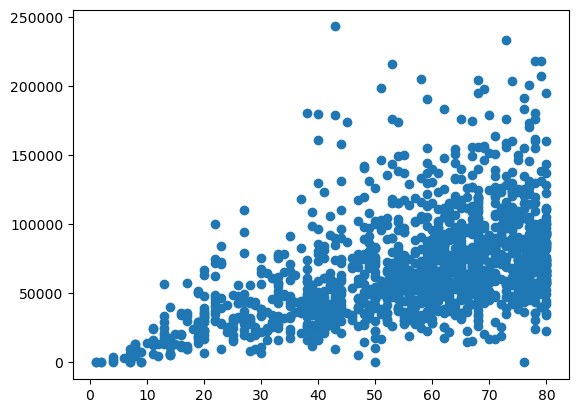

In [22]:
#4 Plot the datapoints using scatter plots.
plt.scatter(df['Age_08_04'],df['KM'])

In [43]:
def som_ini(ipt1,ipt2):
  data=df.values
  som_shape = (ipt1, ipt2)

  som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

  max_iter = 1000
  q_error = []
  t_error = []

  for i in range(max_iter):
      rand_i = np.random.randint(len(data))
      som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data))
      t_error.append(som.topographic_error(data))

  plt.plot(np.arange(max_iter), q_error, label='quantization error')
  plt.plot(np.arange(max_iter), t_error, label='topographic error')
  plt.ylabel('Quantization error')
  plt.xlabel('Iteration index')
  plt.legend()
  plt.show()

  winner_coordinates = np.array([som.winner(x) for x in data]).T
  cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
  plt.figure(figsize=(10,8))
  for c in np.unique(cluster_index):
      plt.scatter(data[cluster_index == c, 0],
                  data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
  for centroid in som.get_weights():
      plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                  s=10, linewidths=20, color='k')
  plt.legend();


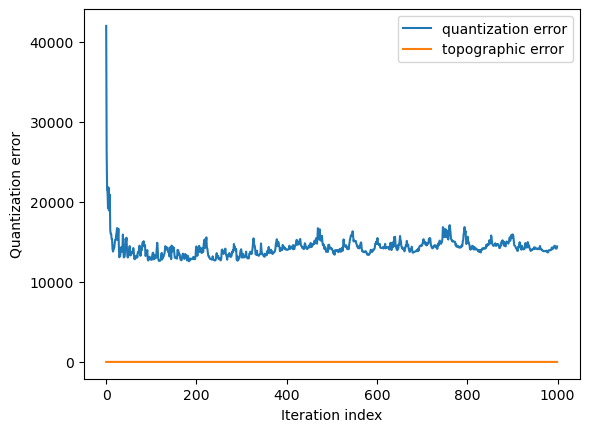

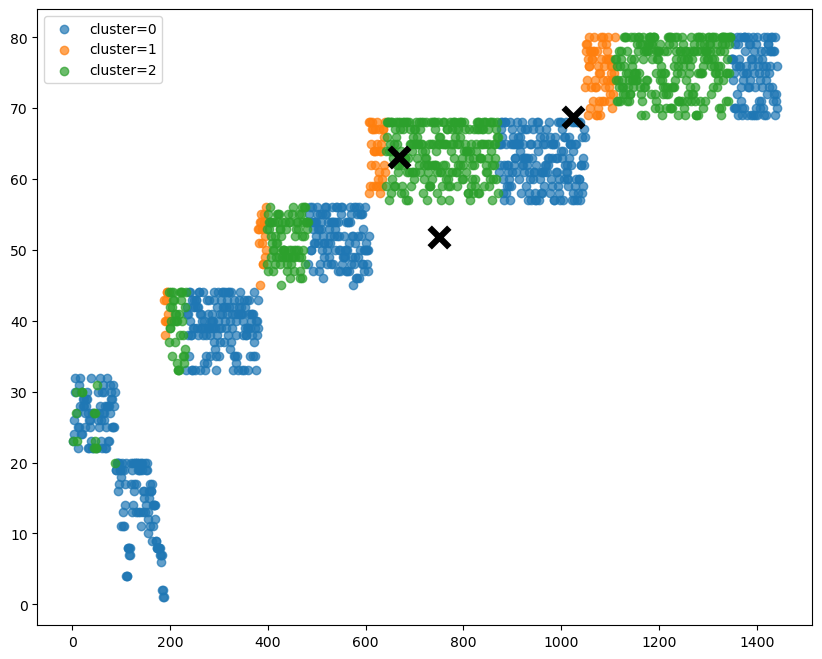

In [44]:
#5 Apply SOM clustering approach and cluster the datapoints into N number of clusters. Determine the optimal number of clusters.
som_ini(1,3)

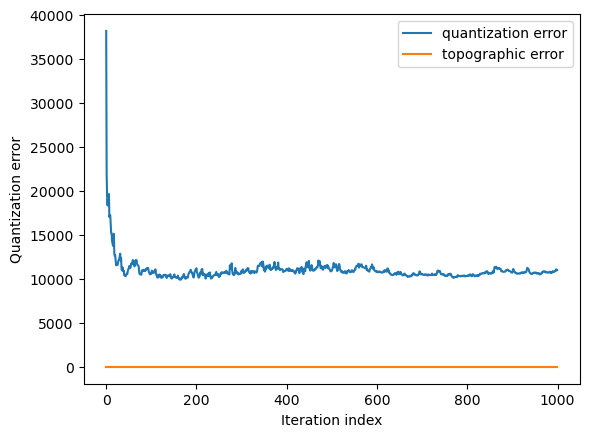

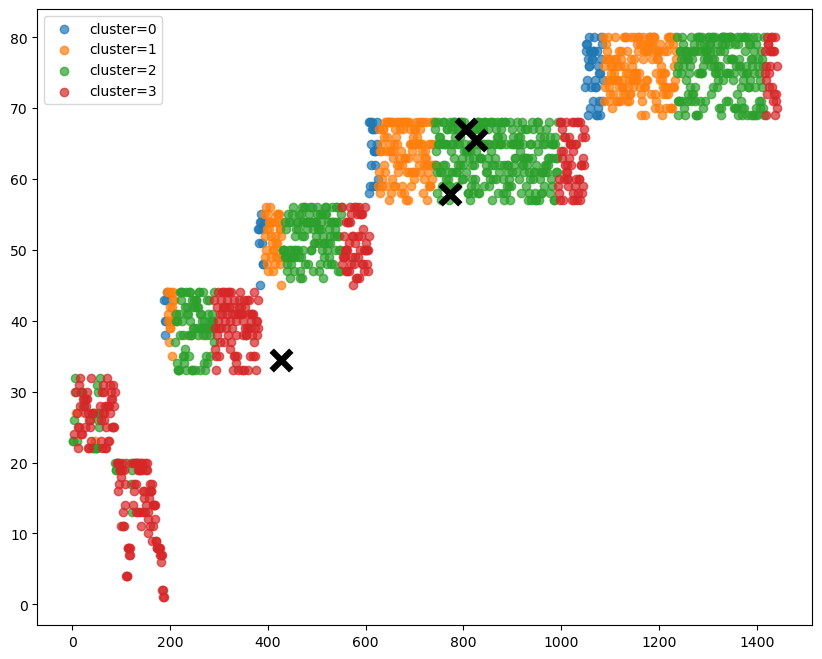

In [25]:
#6 Print and plot the cluster centroids and cluster labels
som_ini(1,4)

In [ ]:
#6
som_ini(1,5)